<!--# STAT 207: Data Science Exploration-->
## Standard Errors and Confidence Intervals

In the previous section we explored how samples statistics give us information about population parameters when the sample is a random sample from the population. In simulations studies we saw that often a population parameter of interest, such as a proportion, a mean or a percentile can be estimated by an analogous sample statistic. If the sample is sufficiently large, we can expect the sample estimate to be close to the population estimate. How close should it be? Can we say something more precise than "close"? 

In this section we answer this question by developing standard errors and confidence intervals for quantifying the variation in sample estimates. We will:

+ Consider how to measure **correlation**

+ Derive **expectations and variances for sums and averages** of random variables

+ Derive the **binomial distribution** from sums of independent Bernoulli trials

+ Investigate sample-based estimates of uncertainty including **standard errors** and **confidence intervals** based on sums, means, and proportions;

+ Use the **Central Limit Theorem** to make normal approximations to the distributions of many common statistics

+ Show how using $n-1$ in the sample variance reduces bias.


### Example: Lead Exposure Study

As an example, consider a study of lead exposure in 124 children living near a lead-emitting smelter in El Paso, Texas (Landrigan et al. 1975).  Blood levels of lead were measured and collected along with information on age, gender, and full scale IQ ('fulliq' in the data set). Full IQ is a measure of intellectual function scaled to have a mean of 100 and standard deviation of 15 in the general population. In the collected data low and high exposure groups are identified as the groups with 'lead < 40' (less than 40 $\mu$g/mL) and 'lead >= 40' (at least 40 $\mu$ g /mL. The data are in the comma separated file, 'lead.csv'. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv('../data/lead.csv')
df.head()

,id,age,sex,status,verbiq,perfiq,fulliq,iqtype,totyrs,hyperact,tapping,group
0,101,11.083333,M,77,61,85,70,WISC,11,NaN,72.0,lead < 40
1,102,9.416667,M,77,82,90,85,WISC,6,0.0,61.0,lead < 40
2,103,11.083333,M,30,70,107,86,WISC,5,NaN,49.0,lead < 40
3,104,6.916667,M,77,72,85,76,WISC,5,2.0,48.0,lead < 40
4,105,11.250000,M,62,72,100,84,WISC,11,NaN,51.0,lead < 40


Let's compare boxplots and sample means of 'fulliq' for the two exposure levels.

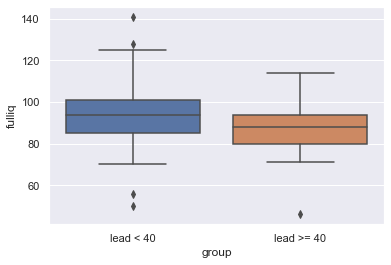

In [3]:
sns.boxplot(x='group', y='fulliq', data=df)
plt.show()

In [4]:
mean_lo = df['fulliq'][df['group']=='lead < 40'].mean()
mean_hi =  df['fulliq'][df['group']=='lead >= 40'].mean()
print('mean difference (low exposure - high exposure) = ', 
      np.round(mean_lo - mean_hi, 4))

mean difference (low exposure - high exposure) =  4.8629


**Question:** Could the mean difference in 'fulliq' between the low and high exposure groups be due to chance variation or some other factors than exposure? To answer this kind question we need more background development.

### Distributions of sums and averages of random variables: expectations and variance

Our previous simulation studies demonstrated that sample means from random samples have expectations equal to the population mean, and their populatoin standard deviations equal to the population standard deviation divided square root of sample size, assuming sampling with replacement. What is the theory behind this?

Recall that the population mean of a random variable $X$, often called the expectation, has the following form:

$$
E[X] = \begin{cases}
\sum_{x} x p(x), \quad \mbox{discrete}\ X\\  
\quad\\
\int_{-\infty}^\infty x f(x) dx, \quad \mbox{continuous}\ X\\ \end{cases}
$$

where $\sum_{x} p(x) = 1$ or $\int f(x) dx = 1$ depending on whether $X$ is deiscrete or continuous.

A function of $X$, say $Y=g(X)$, is a random variable as well. Its expectation can be computed similarly:

$$
E[g(X)] = \begin{cases}
\sum_{x} g(x) p(x), \quad \mbox{discrete}\ X\\  
\quad\\
\int_{-\infty}^\infty g(x) f(x) dx, \quad \mbox{continuous}\ X\\ \end{cases}
$$

For example, let $\mu = E[X]$. Setting $g(x) = (x-\mu)^2$ in the formula shows how to compute the variance, $Var[X] = E[(X-\mu)^2)]$.

**Remark:** For future reference, it is common in many areas of application to have a mixture of discrete and continuous distributions, for example, nonnegative insurance claims data where many individuals have zero claims, but some have positive claims. That will not affect the basic ideas here.



#### Expectation of a weighted sum

Now suppose we have two random variables $X$ and $Y$ and consider the combined random variable $aX + bY$, where $a$ and $b$ are constants. With more advanced techniques it can be shown that for any random variables $X$ and $Y$:


$$
E[aX + bY] = a E[X] + b E[Y]
$$


**Application to sums and averages:** Suppose we have a random sample $X_1, X_2, \ldots, X_n$ where each observation has mean $\mu$ and standard deviation $\sigma$. Define the sample mean $\bar{X} = n^{-1} \sum_{i=1}^n X_i$. Then:


$$
E[X_1 + X_2 + \cdots +X_n] = n\mu
$$



$$
E[\bar{X}] = E[n^{-1}(X_1+X_2+\cdots + X_n)] = \mu
$$


#### Covariance between two random variables

Returning to our friends $X$ and $Y$, we define the **covariance** between them as:

$$
Cov[X, Y] = E[(X-E(X))(Y - E(Y)] = E[XY] - E[X]E[Y]
$$

and the **correlation**

$$
\rho[X, Y] = {Cov[X, Y]\over SD[X] SD[Y]}
$$

where $SD[X] = \sqrt{Var[X]}$ and $SD[Y] = \sqrt{Var[Y]}$. The correlation measures linear dependence between $X$ and $Y$. It is always between -1 and 1. Values close to 1 indicate strong postive linear dependence. Values close to -1 indicate strong negative linear dependence. Correlation = 0 means there is no linear dependence. 

**Remark:** For **independent** random variables $E[XY] = E[X]E[Y]$. This implies that independent random variables are always uncorrelated with each other. 

#### Variances for sums and averages random variables

Next consider the variance of the weighted sum $aX + bY$. Whether they are correlated or not we have:

$$
\begin{align}
Var[aX + bY] &= E[a(X-\mu_X) + b(Y-\mu_Y))^2]\\
\\
&= a^2 E[(X-\mu_X)^2] + b^2 E[(Y-\mu_Y)^2] + 2ab E[(X-\mu_x)(Y-\mu_Y)]\\
\\
&= a^2 Var[X] + b^2 Var[Y] + 2ab Cov[X,Y]\\
\end{align}
$$ 


**Only if $X$ and $Y$ are uncorrelated** (i.e. $Cov[X,Y]=0$), we have the simplified formula:

$$
Var[aX+bY] = a^2 Var[X] + b^2 Var[Y].
$$



#### Independent random samples and the square root rule

For an independent  random sample, $X_1, X_2, \ldots, X_n$, suppose each observation has the same mean $\mu$ and standard deviation $\sigma$. 

The square root rule says that the sample mean, $\bar{X} = n^{-1} \sum_{i=1}^n X_i$, has a populatoin standard deviation proportional to $1\over \sqrt{n}$. Why is this? Observe that

$$
Var(X_1 + X_2 + \cdots +X_n) = n \sigma^2
$$

and

$$
SD(X_1 + X_2 + \cdots +X_n) = \sqrt{n} \sigma.
$$

Therefore,

$$
Var(\bar{X}) = Var[n^{-1}(X_1+X_2+\cdots + X_n)] = {n \sigma^2\over n^2} = {\sigma^2 \over n}
$$

and 

$$
SD(\bar{X}) = {\sigma \over \sqrt{n}}
$$

This is the origin of the square root rule for sample means and proportions.

### Uncertainty Quantification: Estimating Population Means with Standard Errors

Estimation of the sample proportion is simplified by the fact that we can "plug-in" the sample proportion as a part of the formula for the standard error. If the sample is large enough, the sample proportion and sample size give us all the information we need from the sample.

Estimating a general mean with standard errors is a bit more involved, as we need to estimate both the mean and the standard deviation of the population distribution. 

**Example: Pew Research Survey Age Distribution**

The February 2017 Pew Research Center random phone number dialing survey had 1,503 respondents in total.  How close is the mean age of respondents in the survey to the mean age for the population frame of the survey? Let's compute the sample mean and consider how to estimate the standard error.

In [5]:
# Read in the data, extracting only the 'age' column
import zipfile as zp
zf = zp.ZipFile('../data/Feb17-public.zip')
missing_values = ["NaN", "nan", "Don't know/Refused (VOL.)"]
df_pew_age = pd.read_csv(zf.open('Feb17public.csv'), 
                   na_values=missing_values)['age']

In [6]:
# compute and display sample statistics
age_mn = df_pew_age.mean()
age_std = df_pew_age.std()
age_n = df_pew_age.shape[0]
print('mean age=', round(age_mn, 2), 
      ' std age=', round(age_std,2), 
      ' n=', age_n)

mean age= 50.49  std age= 17.84  n= 1503


So our natural estimates of the population mean and standard deviation for age are $\bar{x}=50.49$ and $s = 17.84$.


#### Standard error for the mean

Assuming random sample from the population, we saw previously that the standard deviation of the sample mean is given by 

$$
SD(\bar{X}) = {\sigma\over \sqrt{n}}
$$

where $\sigma$ is the standard deviation of the population distribution, and $n$ is the sample size. Because $\sigma$ is an unknown population parameter, we need to estimate it. Using the sample version standard deviation $S$, we obtain the **standard error:**

$$
SE(\bar{X}) = {S\over \sqrt{n}}
$$

where $S$ is the sample standard deviation. This depends only on sample statistics, so we are able to compute it from the data.


**Example: Pew Research Survey Age Distribution**

We can now compute the standard error for the mean age in the Pew survey.

In [7]:
# standard error calculation
age_se = age_std/np.sqrt(age_n)
print('mean age=', round(age_mn, 2), 
      ' standard error=', round(age_se, 3))

mean age= 50.49  standard error= 0.46


**Remark:** It is important to understand that the *standard error* for the mean is much smaller than the *standard deviation* for the sample. The standard deviation is an estimate of the spread of the values in the population, whereas the standard error is an estimate of the spread in the distribution of $\bar{X}$, which is much smaller due to the averaging effect captured by the square root rule.

### Confidence intervals

With an estimate of the sampling distribution of the sample mean we are prepared to develop a confidence interval for the population mean. In general, we define a **confidence interval** with confidence level $1-\alpha$ as an interval of the form

$$
[C_{lo}(\mbox{Data}),\,  C_{hi}(\mbox{Data})]
$$

with the property that

$$
P\left(C_{lo}(\mbox{Data}) \le \mbox{Parameter} \le C_{hi}(\mbox{Data})\right)
= 1-\alpha
$$

where 'Parameter' refers to the unknown value of the parameter that we are trying to estimate. 

It is frequently the case that we have an estimate that is approximately normally distributed, due to the central limit theorem, and a standard error that is a good estimate of the standard deviation of that normal distribution. In these cases a natural confidence interval takes the form

$$
(\mbox{Estimate} - z_{1-{\alpha\over 2}}* SE, \quad 
\mbox{Estimate} + z_{1-{\alpha\over 2}}* SE)
$$

where $z_q$ is shorthand for the qth quantile of the standard normal distribution. In this case the margin of error is the half width:

$$
\mbox{margin-of-error} = z_{1-{\alpha\over 2}}* SE
$$



### Margin of error and confidence interval for the mean


#### Normality of the sample mean in a normal sample

If $X_1, X_2, \ldots, X_n$ is a random sample from a normal distribution, then the sample mean, $\bar{X}$ is normally distributed as well, with the same mean, $\mu$, as the individual observations, and with a reduced population standard deviation of $\sigma/\sqrt{n}$. 


#### Approximate normality of sample means in general

Even if the original sample is not normally distributed, the **Central Limit Theorem** implies that the sample mean is approximately normal in large samples. We can therefore use the form a normal confidence interval even if the original sample is not precisely normally distributed.


In particular, we have the following equivalent results for the sample mean $\bar{X}$:

$$
\bar{X}\, \mbox{is approximately normal with mean } \mu \mbox{ and standard deviation } SD(\bar{X}) = {\sigma\over\sqrt{n}};
$$

$$
Z_\sigma = {\bar{X} - \mu\over SD(\bar{X})}\, \mbox{ is approximately normal with mean } 0 \mbox{ and standard deviation } 1.
$$

**Plug-in estimate of standard deviation:** When all we have is data we cannot use these expressions, because they depend on the unobservable value of $\sigma$ for the population! However, in large samples we expect, with high probability,

$$
S = \sqrt{{1 \over n-1} \sum_{i=1}^n (X_i - \bar{X})^2}\quad \approx \quad \sigma.
$$

"Plugging in" we have the following useful approximations:

$$
\bar{X} \mbox{is approximately normal with mean } \mu \mbox{ and standard deviation } SE(\bar{X}) = {S\over\sqrt{n}};
$$

$$
Z = {\bar{X} - \mu\over SE(\bar{X})} \mbox{ is approximately normal with mean } 0 \mbox{ and standard deviation } 1.
$$


Based on these approximations we can compute confidence intervals with target levels of confidence. For example, suppose we want a 90% confidence interval for the population mean. Observe that, according to the statements above

$$
P\left(-z_{0.95} \lt {\bar{X} - \mu \over SE(\bar{X})} \lt z_{0.95} \right) \approx 0.90,
$$

which is the same as

$$
P\left(\bar{X} -z_{0.95}*SE(\bar{X}) \lt \mu \lt \bar{X} + z_{0.95}*SE(\bar{X}) \right) \approx 0.90.
$$

Quick calculation:

In [8]:
from scipy.stats import norm
norm.ppf(0.95)

1.6448536269514722

Therefore, the **margin of error** for a 90% confidence level is

$$
MOE = \pm 1.645 * SE(\bar{X})
$$

and the 90% confidence interval has the form

$$
(\bar{X} - 1.645*SE(\bar{X}), \quad \bar{X} + 1.645*SE(\bar{X}))
$$

In general, if we desire a $100(1-\alpha)\%$ confidence interval, then we need to use the mutiplier

$$
z_{1-{\alpha\over 2}} = 100(1-{\alpha\over 2}) \mbox{ percentile of the normal distribution}.
$$

This ensures that the middle part of the distribution, excluding the tails includes $100(1-\alpha)$ percent as illustrated below.

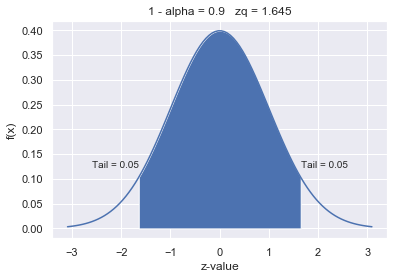

In [9]:
# alpha is the probability of being 
# outside of the confidence interval
alpha = 0.1
zq = norm.ppf(1-(alpha/2))
eps = 0.02
# plotting grid
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
# density curve
plt.plot(x, norm.pdf(x))
plt.xlabel('z-value')
plt.ylabel('f(x)')
# adaptive title and labels
plt.title('1 - alpha = ' + str(1-alpha) + '   zq = ' + str(round(zq, 3)))
plt.text(zq, norm.pdf(zq) + eps, 'Tail = ' + str(alpha/2), horizontalalignment='left')
plt.text(-zq , norm.pdf(zq) + eps, 'Tail = ' + str(alpha/2), horizontalalignment='right')
# add shaded areas whose probability we need
xalpha = np.linspace(norm.ppf(alpha/2), norm.ppf(1-(alpha/2)), 100)
plt.fill_between(xalpha, 0, norm.pdf(xalpha))
plt.show()

**Example: Pew Research Survey Age Distribution**

In the Pew survey example we observed a mean age of $\bar{x}=50.49$ with a standard error of $se = 0.46$. For a 95% confidence interval, the margin of error is $MOE = 1.96 * 0.46 = 0.90$. Therefore, a 95% for the mean age in the population is

$$
(50.49 - 0.90,\quad 50.49 + 0.90) = (49.59,\quad 51.39)
$$

Here are the calculations using Python:

In [10]:
age_mn = df_pew_age.mean()
age_std = df_pew_age.std()
age_n = df_pew_age.shape[0]
age_se = age_std/np.sqrt(age_n)
alpha = 0.01
zq = norm.ppf(1-(alpha/2))
print('mean age=', round(age_mn, 2), ' std age=', 
      round(age_std,2), ' n=', age_n)
print('Std Error for mean:', round(age_se, 3))
print('Confidence level:', 1-alpha)
print('Confidence limits:', (round(age_mn - zq*age_se, 3), 
                             round(age_mn + zq*age_se, 3)))

mean age= 50.49  std age= 17.84  n= 1503
Std Error for mean: 0.46
Confidence level: 0.99
Confidence limits: (49.303, 51.674)


### Binomial proportions as means of independent Bernoulli random variables

A **Bernoulli** random variable is one that takes only two possible values. We'll assume those values are 0 and 1. Typically the "1" corresponds to an outcome we're counting, e.g., "heads" on a coin" or "Plans to vote yes" on a state proposition.

Bernoulli random variables have extremely simple distributions. For any probability value $p$ between 0 and 1, let $p = P(X=1) = 1-P(X=0)$. We've just defined the entire probability mass function for a Bernoulli random variable!

$$
p(x) = 
\begin{cases} 
1-p,& x=0\\
p,& x=1\\
0,& \mbox{otherwise}\\
\end{cases}
$$

For this simple distribution we have $E(X) = p$ and $Var(X) = p(1-p)$  (Exercise).


Next suppose we have a random sample of these Bernoulli random variables, i.e., $n$ draws at random without replacement from a population of 0/1 values. Denote them by

$$
X_1, X_2, \ldots, X_n
$$

where each of these random variables independently equals 1 or 0 with probabilities $p$ and $1-p$ respectively. The total count is the sum

$$
Y = \sum_{i=1}^n X_i = \text{Number of 1's in the sample}
$$

This combined random variable $Y$ has the **Binomial distribution** with parameters $n$ = sample size or number of draws, and $p$ = probability of a 1 for each draw.

Associated with this we define the Binomial proportion, $\hat{p}$ given by

$$
\hat{p} = {Y\over n} = {\text{Number of 1's in the sample}\over n}.
$$

**Binomial probability mass function** 

The pmf of the Binomial distribution can be derived using combinatorial counting methods. It has the form:

$$
p(k) = \binom{n}{k} p^k (1-p)^{n-k}, \quad k=0, 1, \ldots, n
$$

where $\binom{n}{k} = k! (n-k)! / n!$ is the number of ways to choose $k$ positions out of $n$ for the 1's in a sequence of $n$ 1's and 0's. 

The Binomial distribution is included in SciPy as scipy.stat.binom with parameters n and p. The graph below shows the binomial pmf for n=20 and p=0.7.


In [11]:
from scipy.stats import binom

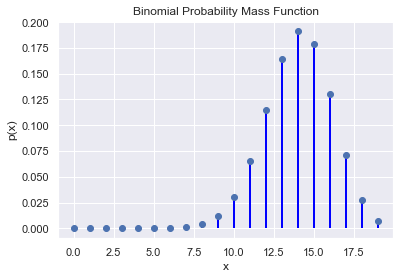

In [12]:
n, p = 20, 0.7
x = np.arange(0,20)
plt.plot(x, binom.pmf(x, n, p), 'bo')
plt.title("Binomial Probability Mass Function")
plt.vlines(x, 0, binom.pmf(x, n=n, p=p), lw=2, colors='blue')
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

**Population mean and standard deviation of Binomial**

Using our results so far, we can easily find the mean and standard deviation for $Y$ and $\hat{p}$. $Y$ is the sum of $n$ independent Bernoulli random variables, each with mean $\mu=p$ and variance $\sigma^2 = p(1-p)$. Therefore the general results above give the following formulas for $Y \sim Binomial(n,p)$:

$$
E(Y) = np, \quad Var(Y) = np(1-p), \quad SD(Y) = \sqrt{np(1-p)}
$$

Similarly, for the binomial proportion $\hat{p}=Y/n$:

$$
E(\hat{p}) = p, \quad Var(\hat{p}) = {p(1-p)\over n}, \quad SD(\hat{p}) = \sqrt{{p(1-p)\over n}}.
$$


In [13]:
# Compare
n, p = 20, 0.7
print('Direct:', n*p, np.sqrt(n*p*(1-p)))
print('Via binom:', binom.mean(n, p), binom.std(n, p))

Direct: 14.0 2.04939015319192
Via binom: 14.0 2.04939015319192


### Estimating population proportions with standard errors

**Example: Pew Research Survey**

In the February 2017 Pew Research Center random phone number dialing survey of 1,503 adults of voting age, the first question in the survey was:

- Q.1 Do you approve or disapprove of the way Donald Trump is handling his job as President?

The possible answers were:

- 1 Approve
- 2 Disapprove
- 9 Don't know/Refused (VOL.)

Let's extract the data for this question.

In [14]:
import zipfile as zp
zf = zp.ZipFile('../data/Feb17-public.zip')
missing_values = ["NaN", "nan", "Don't know/Refused (VOL.)"]
dfpewq1 = pd.read_csv(zf.open('Feb17public.csv'), 
                   na_values=missing_values)['q1']

In [15]:
dfpewq1.shape

(1503,)

In [16]:
dfpewq1.head()

0    Disapprove
1    Disapprove
2    Disapprove
3       Approve
4    Disapprove
Name: q1, dtype: object

In [17]:
approve = sum(dfpewq1=='Approve')
disapprove = sum(dfpewq1=='Disapprove')
n = dfpewq1.shape[0]
q1sum = pd.Series(
    data= [approve, disapprove, n-approve-disapprove, n],
    index= ['Approve', 'Disapprove', 'Other', 'Total']
)
q1sum

Approve        572
Disapprove     861
Other           70
Total         1503
dtype: int64

Now we can compute the sample proportion of approval.

In [18]:
prop = q1sum['Approve']/q1sum['Total']
round(prop, 4)

0.3806

**In this survey the President's approval rate is 38.1% ($\hat{p}=0.381$). What is the margin of error for this estimate?**

First, we need a **standard error**, which is defined to be an estimate of the standard deviation of the estimate. If we knew the true proportion we could compute the standard deviation, but $p$ is what we are trying to estimate! What are the alternatives?

**Method 1 (Upper bound method)**. The SD function for $\hat{p}$ is bounded:

$$
SD(\hat{p}) = \sqrt{p(1-p)\over n} \le \sqrt{0.25 \over n} = {0.5\over\sqrt{n}}
$$

So we could report a **standard error** of *at most* this computed value:

In [19]:
se_bound = 0.5/np.sqrt(q1sum['Total'])
round(se_bound, 4)

0.0129

This is likely to be reasonable for values of $p$ in the range of 0.4 to 0.6 and too conservative for more extreme values of $p$. A more commonly used method is to insert $\hat{p}$ into the standard deviation formula.

**Method 2 (Plug-in method).** Inserting the estimate itself into the standrd deviation formula gives:

$$
SE(\hat{p}) = \hat{SD}(\hat{p}) = \sqrt{\hat{p}(1-\hat{p})\over n}.
$$

For the approval question in the Pew survey we obtain:

In [20]:
se = np.sqrt(prop*(1-prop)/n)
round(se, 4)

0.0125

We see that the plug in method gives a smaller standard error. Is it accurate? The upper bound method already shows that the expected deviation of at most $\hat{p}$ from $p$ is on the order of 1.3\%, so plugging it into the SE formula is likely to be quite accurate for this large of a sample. 

### Normal Approximation for the Binomial via Central Limit Theorem

The sample proportion $\hat{p}=Y/n$ from a Binomial sample is just a rescaling of the the total count $Y$ for the outcome of interest. We now know that $Y$ follows a Binomial distribution with $n$ draws and "succes" probability $p$ for each draw. The probabilty mass function for $\hat{p}$ follows from that of $Y$ as follows:

$$
p_{\hat{p}}(k/n) = 
P\left(\hat{p} = {k\over n} \right)= 
P(Y=k) = \binom{n}{k} p^k (1-p)^{n-p}, \quad k=0,1,2,\ldots,n
$$

Using the sample estimates in the Pew example, the estimated pmf looks like the figure below.

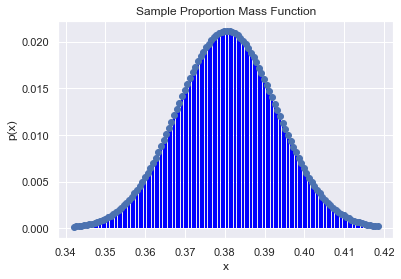

In [21]:
n, p = 1503, prop
x = np.arange(binom.ppf(0.001, n, p), binom.ppf(0.999, n, p))
plt.plot(x/n, binom.pmf(x, n, p), 'bo')
plt.title("Sample Proportion Mass Function")
plt.vlines(x/n, 0, binom.pmf(x, n, p), lw=2, colors='blue')
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

Compare the shape of the normal pdf with the same mean and standard deviation as the scaled binomial pmf.

In [22]:
from scipy.stats import norm

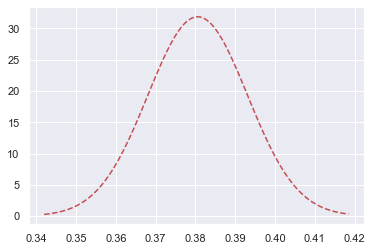

In [23]:
plt.plot(x/n, norm.pdf(x/n, loc=prop, scale=se), 'r--')
plt.show()

#### Normal Approximation for Binomial Sum

Both the binomial distribution for $Y$ and the equivalent rescaled binomial  distribution for $\hat{p}$ can be approximated by normal distributions with the same means and standard deviations if the sample size is large enough. This is a consequence of the central limit theorem for sample averages.

As an example, let's compare $P(X\le x)$ for Binomial(n=100, p=0.2) and Normal(loc=20, scale=4) for several values of $x$. For binomial counts it is more accurate to add or substract 0.5 to the interger count value depending on whether the probability includes or excludes that value.

In [24]:
n, p = 100, 0.2
loc, scale = n*p, np.sqrt(n*p*(1-p))
# values at which to compare
z = [15.5, 20.5, 25.5, 30.5]
# binomial cdf values
bprob = binom.cdf(z, n, p)
nprob = norm.cdf(z, loc, scale)
pd.DataFrame({
    'z': z,
    'binom.cdf(z, 100, 0.2)': bprob,
    'norm.cdf(z, 20, 4)': nprob
})

,z,"binom.cdf(z, 100, 0.2)","norm.cdf(z, 20, 4)"
0,15.5,0.128506,0.130295
1,20.5,0.559462,0.549738
2,25.5,0.912525,0.915434
3,30.5,0.993941,0.995668


#### Margin of error for Binomial proportion

In the Pew survey example, let's compute the margin of error for a confidence level of 95%.


In [25]:
# Estimate
prop = q1sum['Approve']/q1sum['Total']
# compute the multiplier from N(0,1)
zq = norm.ppf(0.975)
# compute the standard error
SE = np.sqrt(prop*(1-prop)/q1sum['Total'])
# compute and display margin of error
print(' Estimate=', round(prop, 4))
print(' Standard Error=', round(SE, 4)) 
print(' SE multiplier=', round(zq, 4))     
print(' Margin of error:', round(zq*SE, 4))

 Estimate= 0.3806
 Standard Error= 0.0125
 SE multiplier= 1.96
 Margin of error: 0.0245


Conclusion: We are 95% confident that the sample estimate of 38.1% within $\pm$2.45% of the population percentage for approval.

Equivantly, we compute a 95% confidence interval:

In [26]:
np.round([prop-zq*SE, prop+zq*SE], 3)

array([0.356, 0.405])

### Advanced topic: Why do we divide by n-1 in the sample standard deviation?

The short answer is that this makes $S^2$ **unbiased** as an estimator of the population variance $\sigma^2$. But this is worth delving into in a bit more detail, because it relates to a general idea that we will see repeatedly, that using the sample **training data** for estimating accuracy often makes results biased and we need to adjust for this in one way or another.

**Framework:** Consider a random sample $X_1, X_2, \ldots, X_n$ from a population or distribution with mean $\mu$ and standard deviation $\sigma$. Our standard estimators for $(\mu, \sigma^2)$ are $(\bar{X}, S^2)$ where

$$
\bar{X} = {1\over n} \sum_{i=1}^n X_i \quad\mbox{ and } \quad
S^2 = {1 \over n-1} \sum_{i=1}^n (X_i - \bar{X})^2.
$$

What gives with the $n-1$??

Let's work out the expected value using the facts we studied earlier in this section. Recall that the expectation of a sum of random variables is the sum of the expectations. Using this fact we already figured out that

$$
E(\bar{X}) = \mu \quad \mbox{and} \quad E((\bar{X} - \mu)^2) = {\sigma^2\over n}.
$$

Next, consider the sum-of-squares of deviations of $X_i$ about the true, unknown $\mu$:

$$
SS(\mu) = \sum_{i=1}^n (X_i - \mu)^2.
$$

Using our facts about expectations we have:

$$
E(SS(\mu)) = \sum_{i=1}^n E((X_i - \mu)^2) = \sum_{i=1}^n \sigma^2 = n \sigma^2.
$$

Therefore, if we knew $\mu$, then we could use $SS(\mu)/n$ as an unbiased estimtator because

$$
E\left( {1\over n} SS(\mu) \right) = \sigma^2.
$$

But we don't know $\mu$. What is the impact of plugging in the estimate $\bar{X}$ into the sum-of-squares?

$$
\begin{align}
SS(\bar{X}) =& \sum_{i=1}^n (X_i - \bar{X})^2 \\
=& \sum_{i=1}^n (X_i - \mu)^2 + \sum_{i=1}^n (\mu - \bar{X})^2
+ 2 \sum_{i=1}^n (X_i - \mu) (\mu - \bar{X}) \\
\\
=& SS(\mu) + n(\bar{X} - \mu)^2 -  2n (\bar{X} - \mu)^2\\
\\
=& SS(\mu) - n(\bar{X} - \mu)^2.\\
\end{align}
$$

Taking expectations on both sides of the equation gives

$$
E(SS(\bar{X}) = E(SS(\mu)) - n*Var(\bar{X}) = n\sigma^2 - \sigma^2 = (n-1) \sigma^2.
$$

Therefore, we get an unbiased, sample-based estimator of $\sigma^2$ if we use $S^2$, because

$$
E(S^2) = E\left({SS(\bar{X})\over n-1}\right) = {(n-1) \sigma^2 \over n-1} = \sigma^2.
$$

**Conclusion:** plugging the sample estimate $\bar{X}$ into the expression for the sample variance (and standard deviation) underestimates the spread in the population distribution. We adjust for that by dividing by $n-1$ instead of $n$. This inflates the standard deviation estimate by the factor

$$
\sqrt{n \over n-1}.
$$

In very large samples this makes very little difference, but it has a noticable impact in smaller samples.


### Next 

Compare two means : $\mu_1 - \mu_2$

Estimates: $\bar{X_1} - \bar{X_2}$

$Var(\bar{X}_1 - \bar{X}_2) = {\sigma_1^2 \over n_1} + {\sigma_2^2 \over n_2}$

Develop standard error and confidence interval.

---
### References

Landrigan PJ, Whitworth RH, Baloh RW, Staehling NW, Barthel WF, Rosenblum BF. Neuropsychological dysfunction in children with chronic low-level lead absorption. *The Lancet*, Vol. 305, Issue 7909, P708-712, March 29, 1975. https://doi.org/10.1016/S0140-6736(75)91627-X

---
STAT 207, Douglas Simpson, University of Illinois at Urbana-Champaign